In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

%matplotlib inline

In [2]:
data = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
origin = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# LabelEncode Sex feature
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [4]:
# Categorise by title
data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [5]:
data['Age'] = data.Age.fillna(data.Age.mean())

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data['Title'] = data.Name
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')
print(data.Title.value_counts())
age_by_title = data.groupby('Title').Age.mean()
age_by_title

Mr              517
Miss            185
Mrs             126
Master           40
Rare             22
the Countess      1
Name: Title, dtype: int64


Title
Master           7.086662
Miss            23.373882
Mr              31.753762
Mrs             34.967341
Rare            45.395414
the Countess    33.000000
Name: Age, dtype: float64

In [7]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,Mr,1,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,Mrs,0,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,Miss,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,Mrs,0,35.000000,1,0,113803,53.1000,C123,S,Mrs
5,0,3,Mr,1,35.000000,0,0,373450,8.0500,NaN,S,Mr
6,0,3,Mr,1,29.699118,0,0,330877,8.4583,NaN,Q,Mr
7,0,1,Mr,1,54.000000,0,0,17463,51.8625,E46,S,Mr
8,0,3,Master,1,2.000000,3,1,349909,21.0750,NaN,S,Master
9,1,3,Mrs,0,27.000000,0,2,347742,11.1333,NaN,S,Mrs


In [8]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

data['Name'] = data['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))

/home/jor0/CodeHub/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
data.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
PassengerId,,,,,,,
1,3,22.0,1,0,A/5 21171,NaN,S
2,1,38.0,1,0,PC 17599,C85,C
3,3,26.0,0,0,STON/O2. 3101282,NaN,S
4,1,35.0,1,0,113803,C123,S
5,3,35.0,0,0,373450,NaN,S


In [10]:
data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))
data.Fare.fillna(data.Fare.mean())        
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))

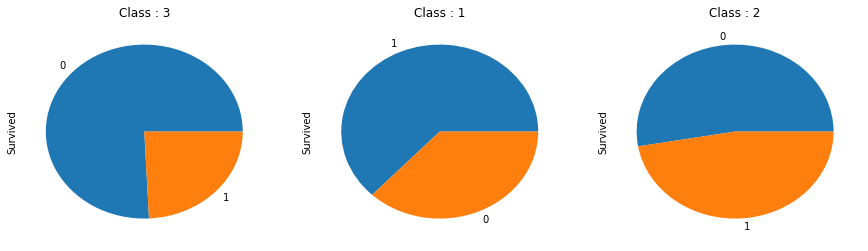

In [11]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    data.Survived[data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [12]:
data['Pclass'] = StandardScaler().fit_transform(data['Pclass'].values.reshape(-1, 1))

/home/jor0/CodeHub/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,0.827377,-0.797294,1,-0.592481,1,0,A/5 21171,-0.502445,NaN,S,Mr
2,1,-1.566107,1.537975,0,0.638789,1,0,PC 17599,0.786845,C85,C,Mrs
3,1,0.827377,1.070922,0,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss
4,1,-1.566107,1.537975,0,0.407926,1,0,113803,0.420730,C123,S,Mrs
5,0,0.827377,-0.797294,1,0.407926,0,0,373450,-0.486337,NaN,S,Mr
6,0,0.827377,-0.797294,1,0.000000,0,0,330877,-0.478116,NaN,Q,Mr
7,0,-1.566107,-0.797294,1,1.870059,0,0,17463,0.395814,E46,S,Mr
8,0,0.827377,0.603868,1,-2.131568,3,1,349909,-0.224083,NaN,S,Master
9,1,0.827377,1.537975,0,-0.207709,0,2,347742,-0.424256,NaN,S,Mrs


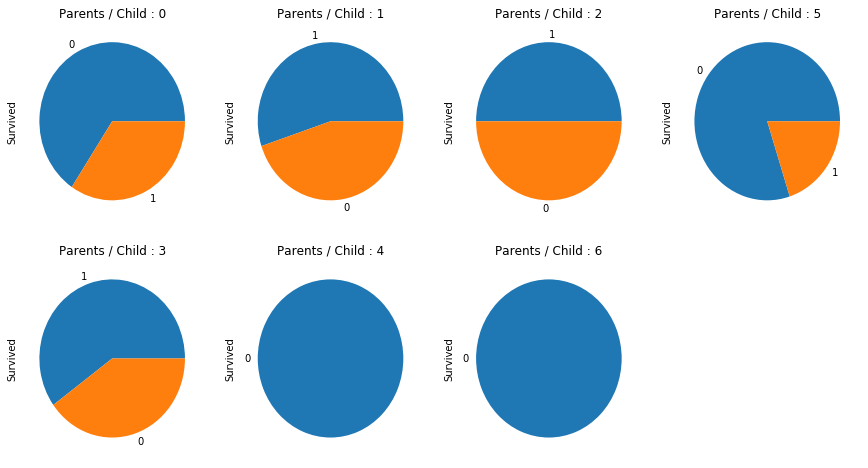

In [14]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    data.Survived[data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [15]:
# based on the distribution of the survivors we give different values
# to the different categories which will be scalled afterwards
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
data['Parch'] = data['Parch'].apply(lambda x: replacement.get(x))
data['Parch'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))

/home/jor0/CodeHub/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
data.drop('Ticket', axis=1, inplace=True)

In [17]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

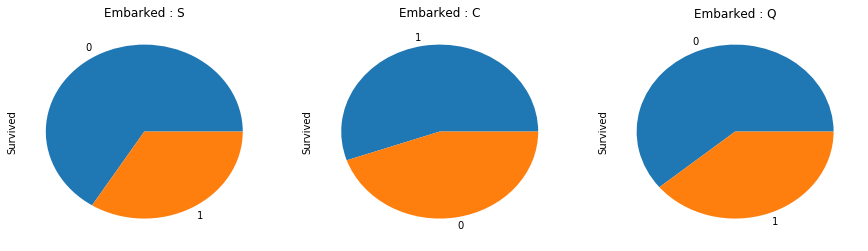

In [18]:
data['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in data['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    data.Survived[data['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [19]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
data['Embarked'] = StandardScaler().fit_transform(data['Embarked'].values.reshape(-1, 1))
data.head()['Embarked']

/home/jor0/CodeHub/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


PassengerId
1   -0.585954
2    1.942303
3   -0.585954
4   -0.585954
5   -0.585954
Name: Embarked, dtype: float64

In [20]:
data['Cabin'].fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

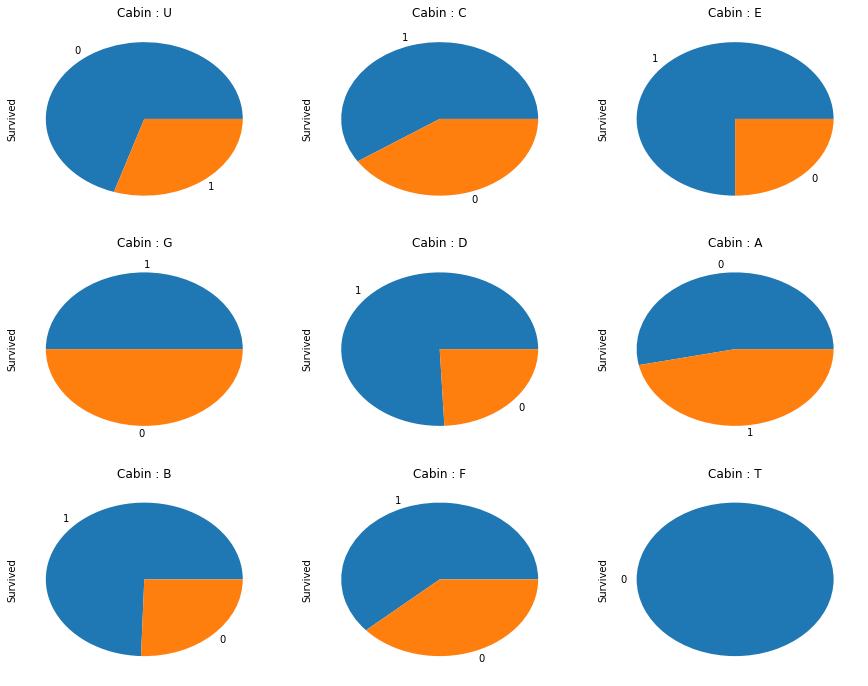

In [21]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in data['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    data.Survived[data['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [22]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
data['Cabin'] = StandardScaler().fit_transform(data['Cabin'].values.reshape(-1, 1))
data.head()['Cabin']

/home/jor0/CodeHub/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


PassengerId
1   -0.494813
2    0.960231
3   -0.494813
4    0.960231
5   -0.494813
Name: Cabin, dtype: float64

In [23]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,0.827377,-0.797294,1,-0.592481,1,-0.468807,-0.502445,-0.494813,-0.585954,Mr
2,1,-1.566107,1.537975,0,0.638789,1,-0.468807,0.786845,0.960231,1.942303,Mrs
3,1,0.827377,1.070922,0,-0.284663,0,-0.468807,-0.488854,-0.494813,-0.585954,Miss
4,1,-1.566107,1.537975,0,0.407926,1,-0.468807,0.420730,0.960231,-0.585954,Mrs
5,0,0.827377,-0.797294,1,0.407926,0,-0.468807,-0.486337,-0.494813,-0.585954,Mr


In [24]:
from sklearn.model_selection import train_test_split
survived = origin['Survived']
data.drop('Survived', axis=1, inplace=True)
data.drop('Title', axis=1, inplace=True)
data.rename({'Name': 'Title'})
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.2)

In [25]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0.827377,-0.797294,1,-0.592481,1,-0.468807,-0.502445,-0.494813,-0.585954
2,-1.566107,1.537975,0,0.638789,1,-0.468807,0.786845,0.960231,1.942303
3,0.827377,1.070922,0,-0.284663,0,-0.468807,-0.488854,-0.494813,-0.585954
4,-1.566107,1.537975,0,0.407926,1,-0.468807,0.420730,0.960231,-0.585954
5,0.827377,-0.797294,1,0.407926,0,-0.468807,-0.486337,-0.494813,-0.585954
6,0.827377,-0.797294,1,0.000000,0,-0.468807,-0.478116,-0.494813,0.678175
7,-1.566107,-0.797294,1,1.870059,0,-0.468807,0.395814,2.415274,-0.585954
8,0.827377,0.603868,1,-2.131568,3,2.174907,-0.224083,-0.494813,-0.585954
9,0.827377,1.537975,0,-0.207709,0,0.853050,-0.424256,-0.494813,-0.585954


In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)


0.798882681564
0.810055865922


/home/jor0/CodeHub/venv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
